# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**MICHAEL, OKEREAFOR**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

## Problem statement

To keep the lights on and increase the standard of living for its population, the Spanish government is considering raising its renewable energy resource infrastructure investments.

In recent years, evidence has demonstrated that reliance primarily on nonrenewable resources is unsustainable. As a result, the government needs information on the country's renewable and fossil-fuel energy generation trends and patterns, and it has been tracking the various energy sources available inside the country.

Following consultation, we(*Fantastic5 DataScience Team*) agreed to model the shortfall between the energy generated by means of fossil fuels and various renewable sources for the country of Spain.

## Objectives

- Explore and visualize the dataset given to us.

- Clean and engineer the dataset.

- Build two or more models that will predict the 3 hourly load shortfall.

- Check the accuracy of each of the models.

- Select the best model that we can use to make our predictions.


## Hypothesis

We decided to test two hypotheses: first, to determine the relationship between weather features from various cities and explore the trend that emerged throughout the length of time the data was collected, and second, to see if the feature variables and the target variable had any relationship.

**Hypothesis 1**
- There is no correlation between weather features from various cities in the dataset.

**Hypothesis 2**
- There is no correlation between the target variable (load shortfall) and the predictors.

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

### 1.1 Packages to be Imported and their uses
The following Packages/Libraries will be imported and used in this project work:

- Numpy: For arrays, algebra and Mathematical Calculations.
- Pandas: For Dataframe Manipulation and Statistical calculations such as mean.
- Matplotlib: For ploting normal charts and graphs.
- Seaborn: For scatterplots.
- Plotly: For producing interactive publication-quality graphs.
- Sklearn:  For predictive data analysis
- Statsmodels: For the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.
    

In [3]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from seaborn import pairplot
import plotly.express as px
from statsmodels.graphics.correlation import plot_corr

# Libraries for data preparation and model building
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import math
from statsmodels.graphics.correlation import plot_corr


import warnings
warnings.filterwarnings('ignore') # just to turn off or ignore minor warnings that may pop-up while executing codes.

# Setting global constants to ensure notebook results are reproducible
#PARAMETER_CONSTANT = ###

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

### 2.1 Spain Electricity Shortfall Data

This dataset contains information about the weather conditions in various Spanish cities for the time of 2015-2017. The dataset also has information about the three hourly load shortfalls for the same period. In the context of this problem, the three hourly load shortfall is the difference between the energy generated by means of fossil fuels and renewable sources.

The dataset contains 47 features and 1 target. The features include the time and the city-specific weather variables i.e. the wind speed in the city of Barcelona. In total there is weather data available for 5 cities but not all cities have weather information available for every weather category e.g. we might have wind speed data for Barcelona but not rainfall data whereas we have both rainfall and wind speed information for Valencia.

We have weather data for the following cities of Spain:

 - Madrid
 - Valencia
 - Seville
 - Bilbao
 - Barcelona

The weather categories in the dataset include:
 - wind_speed
 - wind_degree
 - rain_1h
 - rain_3h
 - humidity
 - clouds_all
 - pressure
 - snow_3h
 - weather_id
 - temp_max
 - temp

In [4]:
#The code below is used to load the data into Jupyter Notebook environment

df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

#Combined data set

combined_df = pd.concat([df_train, df_test], axis=0)

In [5]:
#Investigating the shape of the data: Train, Test and Combined

data_shape = [df_train.shape, df_test.shape, combined_df.shape]
print('''
The shape of the train data is {} 
The shape of the test data is {} and 
The combined data has a shape of {}
'''.format(data_shape[0], data_shape[1], data_shape[2]))


The shape of the train data is (8763, 49) 
The shape of the test data is (2920, 48) and 
The combined data has a shape of (11683, 49)



In [6]:
# Displaying the first 5 entries of our dataset to have a feel of 
# the kind of data we'll be working with

combined_df.head()

Unnamed: 0                 time  Madrid_wind_speed Valencia_wind_deg  \
0           0  2015-01-01 03:00:00           0.666667           level_5   
1           1  2015-01-01 06:00:00           0.333333          level_10   
2           2  2015-01-01 09:00:00           1.000000           level_9   
3           3  2015-01-01 12:00:00           1.000000           level_8   
4           4  2015-01-01 15:00:00           1.000000           level_7   

   Bilbao_rain_1h  Valencia_wind_speed  Seville_humidity  Madrid_humidity  \
0             0.0             0.666667         74.333333        64.000000   
1             0.0             1.666667         78.333333        64.666667   
2             0.0             1.000000         71.333333        64.333333   
3             0.0             1.000000         65.333333        56.333333   
4             0.0             1.000000         59.000000        57.000000   

   Bilbao_clouds_all  Bilbao_wind_speed  ...  Madrid_temp_max  Barcelona_temp  \
0                0.0           1.000000  ...       265.938000      281.013000   
1                0.0           1.000000  ...       266.386667      280.561667   
2                0.0           1.000000  ...       272.708667      281.583667   
3                0.0           1.000000  ...       281.895219      283.434104   
4                2.0           0.333333  ...       280.678437      284.213167   

   Bilbao_temp_min  Bilbao_temp  Barcelona_temp_min  Bilbao_temp_max  \
0       269.338615   269.338615          281.013000       269.338615   
1       270.376000   270.376000          280.561667       270.376000   
2       275.027229   275.027229          281.583667       275.027229   
3       281.135063   281.135063          283.434104       281.135063   
4       282.252063   282.252063          284.213167       282.252063   

   Seville_temp_min Madrid_temp  Madrid_temp_min  load_shortfall_3h  
0        274.254667  265.938000       265.938000        6715.666667  
1        274.945000  266.386667       266.386667        4171.666667  
2        278.792000  272.708667       272.708667        4274.666667  
3        285.394000  281.895219       281.895219        5075.666667  
4        285.513719  280.678437       280.678437        6620.666667  

[5 rows x 49 columns]

In [7]:
# Let's investigate the data type stored in each column and check if there are any missing values.

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

From the output above, we observed that:
- There are 8763 rows in the dataset with 49 and 48 columns in the training and testing dataset respectively which.
- We have an `unnamed: 0` column having the same values as index, hence, it was dropped from the dataset.
- `Valencia_wind_deg` and `Seville_pressure` columns show 'object' datatype, we will convert them to contain numerical values, because regression works with only numeric datatypes.
- `Time` is also an 'object' datatype. it contains the "Year", "Month", "Day", "Hour", "Minute", and "Seconds" in which the load shortfall was recorded. In its case, we will break it down to different features.
- `Valencia_pressure` has 2068 null or missing values. We can later fill up these missing values with either mean or median of the column.

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


### 3.1 Data Exploration
In this section, we performed some exploratory data analysis which is a data analytics approach that uses visual means to help us comprehend the data in depth and learn about the different data features.

We begin by creating a function called `weather_features_by_cities`. The function will take a DataFrame (df), a specific City Name (city) and a caption for the output. The function will then return a data frame with some descriptive statistics for the specified city as well as all of the weather variables associated with it. The features are described according to the following list of cities: `['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']`.

In [8]:
def weather_features_by_cities(df, city, caption):
    state = [col for col in df.columns if city in col]
    city_list = [t for t in state]
    return df[city_list].describe().apply(lambda x: round(x, 2)).T.style.set_caption(caption)

In [9]:
weather_features_by_cities(df_train, 'Barcelona', 'Table 3.1.1: Descriptive Statistics of Weather Features in Barcelona')

Table 3.1.1 above shows the weather features recorded for Barcelona. The features include the following:
  - Wind speed
  - Wind degree
  - Pressure
  - Temperature
  
Other features which are associated with Barcelona but not be entirely weather features include:
  - Rain 1h
  - Rain 3h
  - Weather id
  - Temperature Max
  - Temperature Min

In [10]:
weather_features_by_cities(df_train, 'Bilbao', 'Table 3.1.2: Descriptive Statistics of Weather Features in Bilbao')

Table 3.1.2 shows the descriptive statistics of the weather features recorded for the city of Bilbao. The following weather features were captured:
  - Wind speed
  - Wind degree
  - Clouds all
  - Pressure
  - Temperature
  
Other features associated with weather are also recorded as follows:
  - Rain 1h
  - Snow 3h
  - Weather id
  - Temperature Max
  - Temperature Min

In [11]:
weather_features_by_cities(df_train, 'Madrid', 'Table 3.1.3: Descriptive Statistics of Weather Features in Madrid')

In Table 3.1.3 above, we can see that the weather features recorded for Madrid include the following:
  - Wind speed
  - Humidity
  - Clouds all
  - Pressure
  - Temperature
  
Other features which are associated with Madrid but can not be entirely weather features include:

  - Rain 1h
  - Weather id
  - Temperature Max
  - Temperature Min

In [12]:
weather_features_by_cities(df_train, 'Seville', 'Table 3.1.4: Descriptive Statistics of Weather Features in Seville')

Table 3.1.4 shows the descriptive statistics of the weather features recorded for Seville. The features recorded are as follows:
  - Wind speed
  - Humidity
  - Clouds all
  - Temperature
  
Other features which are associated with Seville but can not be entirely weather features include:

  - Rain 1h
  - Rain 3h
  - Weather id
  - Temperature Max
  - Temperature Min

In [13]:
weather_features_by_cities(df_train, 'Valencia', 'Table 3.1.5: Descriptive Statistics of Weather Features in Valencia')

In Table 3.1.5, the follwing weather features were capture for Valencia:

  - Wind speed
  - Humidity
  - Pressure
  - Temperature
  
Other features which are associated with Valencia but can not be entirely weather features include:

  - Snow 3h
  - Temperature Max
  - Temperature Min

We notice the following features that are common to some cities based on the weather feature classification we have provided under each city. This data will help us do further investigation as we compare features across cities and gain a better understanding of how to approach our aim of anticipating load shortfalls using meteorological data.

 - `Cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']`, \\\
   `common_features = ['wind_speed', 'temp']`
 
 - `Cities = ['Barcelona', 'Bilbao', 'Madrid', 'Valencia']`, \\\
   `common_features = ['pressure']`
 
 - `Cities = ['Madrid', 'Seville', 'Valencia']`, \\\
   `common_features = ['humidity']`
 
 - `Cities = ['Bilbao', 'Madrid', 'Seville']`, \\\
   `common_features = ['clouds_all']`
 
 - `Cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville']`, \\\
    `common_features = ['rain_1h']`
 
 - `Cities = ['Barcelona', 'Seville']`, `common_features = ['rain_3h']`
 
 - `Cities = ['Bilbao', 'Valencia']`,  `common_features = ['snow_3h']`
 
What follows next is to produce charts that will show the distribution of these weather features based on the cities and also test our first hypothesis.

## Hypothesis 1

To test our first hypothesis: There is no correlation between weather features from various cities in the dataset, we have to set the hull and alternate hypothesis as follows:

$H_0$: There is no relationship in the trend between the weather features from various cities.

$H_1$: There is a relationship in the trend between the weather features from various cities.

In [14]:
# Produce plots for common features in various cities.

def common_features_plot(df, cities, common_features):
    columns = []
    for city in cities:
        for feature in common_features:
            columns.append(city+'_'+feature)
    
    sns.set(rc = {'figure.figsize':(12,6)})
    return sns.heatmap(df[columns].corr(), annot=True)

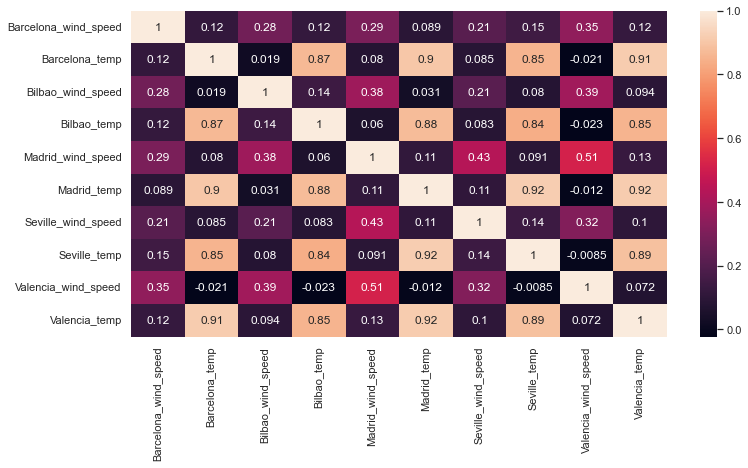

In [15]:
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']
common_features = ['wind_speed', 'temp']

common_features_plot(df_train, cities, common_features)
plt.show()

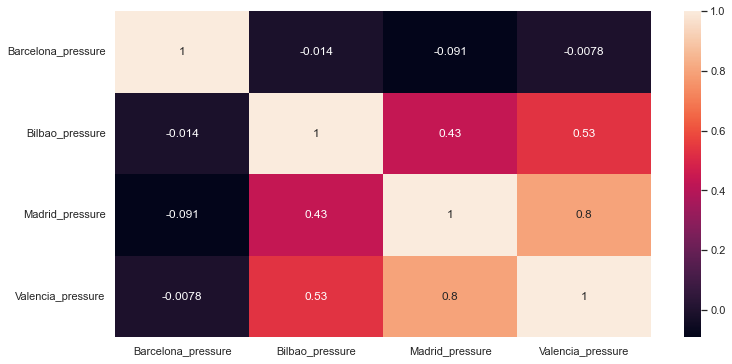

In [16]:
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Valencia']
common_features = ['pressure']

common_features_plot(df_train, cities, common_features)
plt.show()

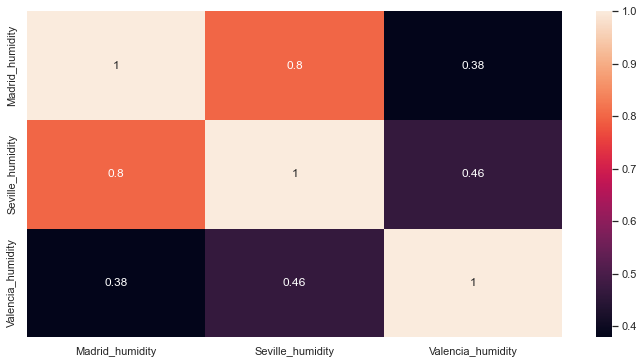

In [17]:
cities = ['Madrid', 'Seville', 'Valencia']
common_features = ['humidity']

common_features_plot(df_train, cities, common_features)
plt.show()

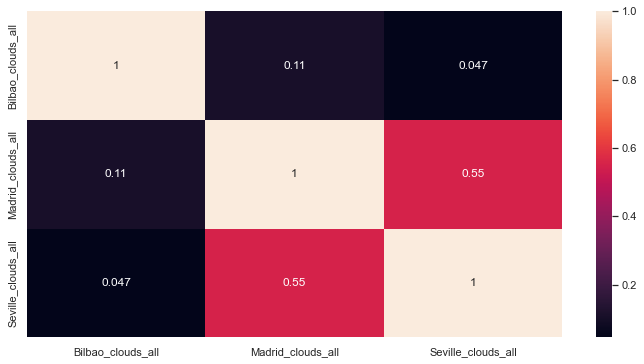

In [18]:
cities = ['Bilbao', 'Madrid', 'Seville']
common_features = ['clouds_all']

common_features_plot(df_train, cities, common_features)
plt.show()

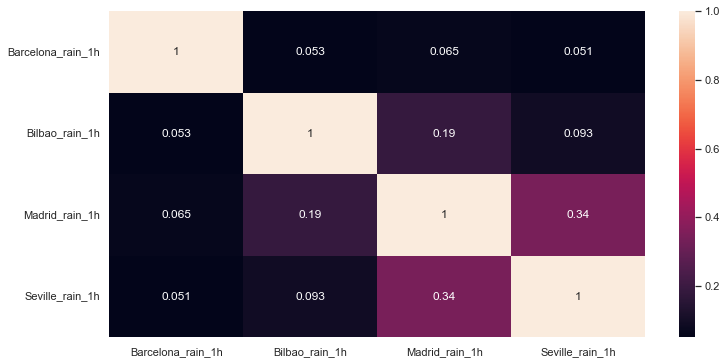

In [19]:
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville']
common_features = ['rain_1h']

common_features_plot(df_train, cities, common_features)
plt.show()

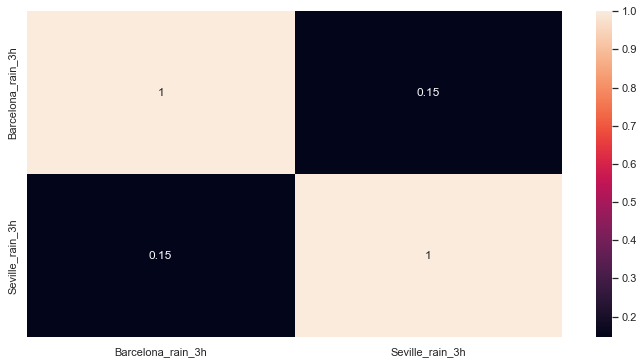

In [20]:
cities = ['Barcelona', 'Seville']
common_features = ['rain_3h']

common_features_plot(df_train, cities, common_features)
plt.show()

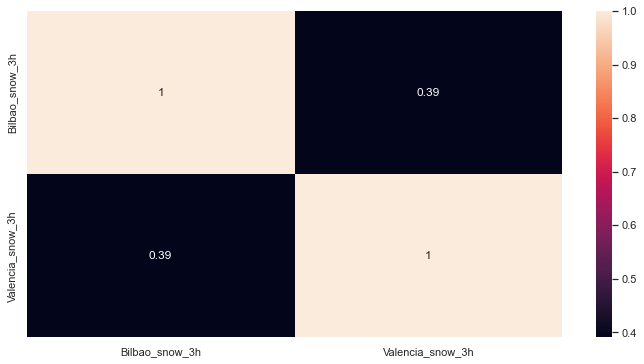

In [21]:
cities = ['Bilbao', 'Valencia']
common_features = ['snow_3h']

common_features_plot(df_train, cities, common_features)
plt.show()

In [22]:
def scatter_plot_of_weather_features_by_cities(df, city):
    #import hvplot.pandas
    state = [col for col in df.columns if city in col]
    city_list = [t for t in state]
    columns_to_drop = ([column for column in city_list if 'max' in column.split('_')
               or 'min' in column.split('_')])

    for col in city_list:
        if col in columns_to_drop:
            city_list.remove(col)
        
    return df[city_list].hist(alpha=0.5, figsize=(10, 8))

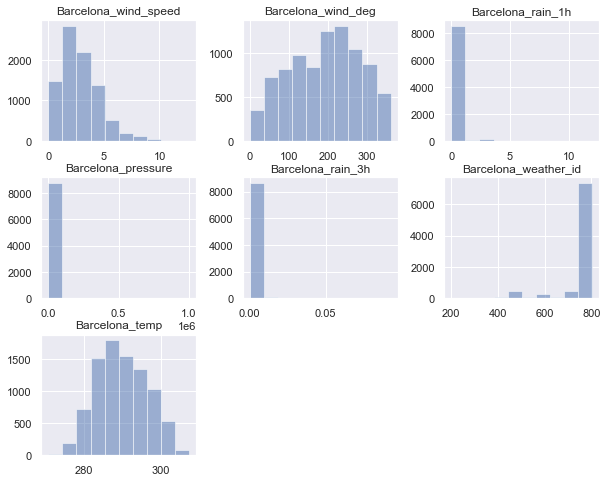

In [23]:
scatter_plot_of_weather_features_by_cities(df_train, 'Barcelona')
plt.show()

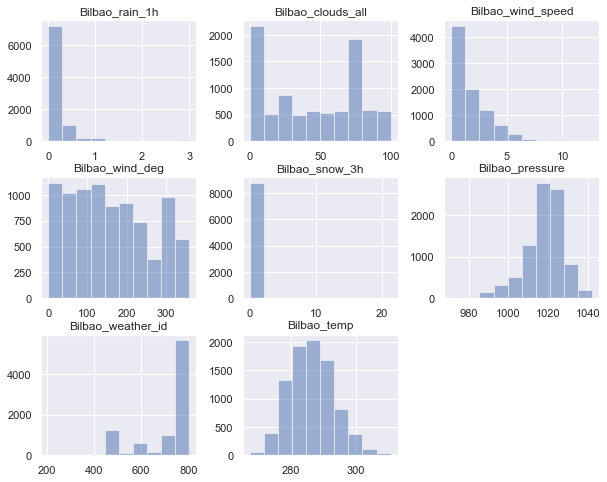

In [24]:
scatter_plot_of_weather_features_by_cities(df_train, 'Bilbao')
plt.show()

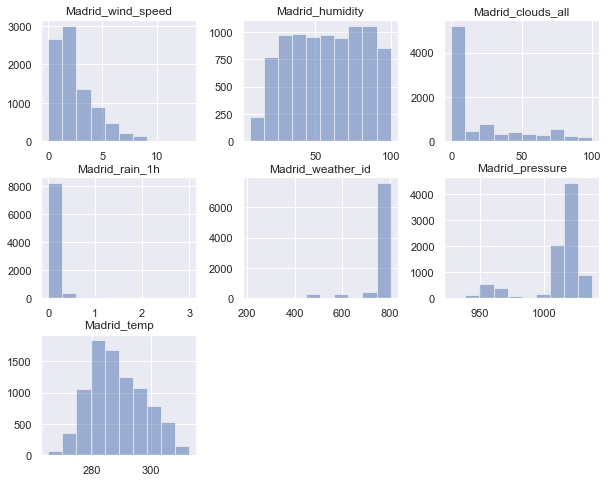

In [25]:
scatter_plot_of_weather_features_by_cities(df_train, 'Madrid')
plt.show()

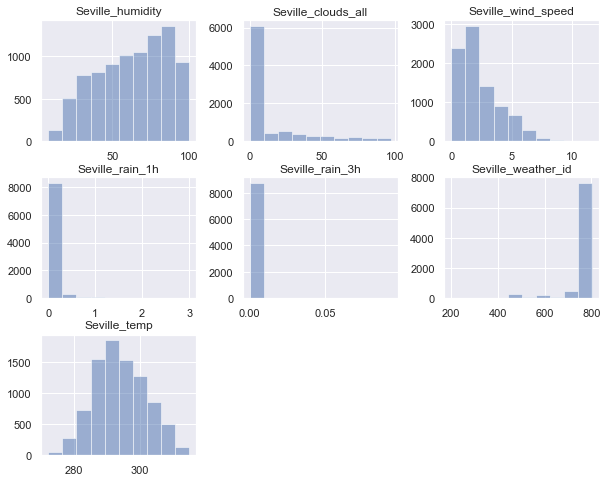

In [26]:
scatter_plot_of_weather_features_by_cities(df_train, 'Seville')
plt.show()

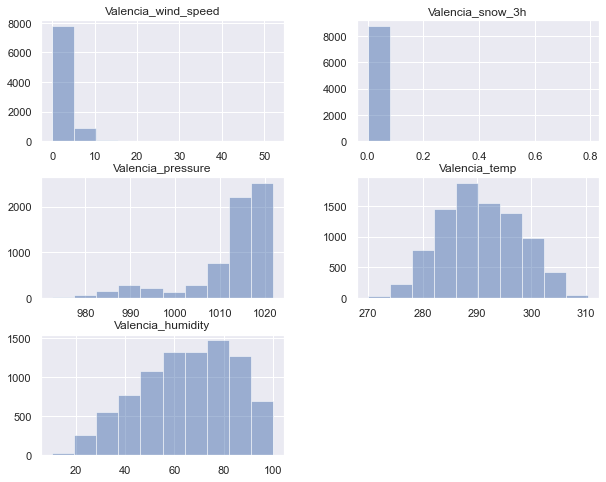

In [27]:
scatter_plot_of_weather_features_by_cities(df_train, 'Valencia')
plt.show()

When looking at features like `Barcelona_pressure`, we suspect ouliers.
Let us use **kurtosis** to determine if there are outliers in our dataframe. Remember that **kurtosis** tells how heavy the tail of a feature distribution is; we can use this to identify outliers if the kurtosis value of any feature is greater than 3 (>3).

## Hypothesis 2

Now, we have to the second hypothesis: There is no correlation between the target variable (load shortfall) and the predictors. We again have to set the hull and alternate hypothesis as follows:

$H_0$: There is no relationship between the target variable (load shortfall) and the predictors.

$H_1$: There is a relationship between the target variable (load shortfall) and the predictors.

In [28]:
combined_df.kurtosis()

Unnamed: 0                -1.200000
Madrid_wind_speed          2.156333
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10.402060
Valencia_pressure          2.939921
Seville_temp_max          -0

As shown by the **kurtosis** *report*, the following features can be said to have numerous outliers:
Bilbao_rain_1h, Valencia_wind_speed, Barcelona_rain_1h, Seville_rain_1h, Bilbao_snow_3h, Barcelona_pressure, Seville_rain_3h, Valencia_snow_3h, Barcelona_rain_3h, Madrid_weather_id, Barcelona_weather_id and Seville_weather_id.


## Feature Interactions
Let us use the boxplot to check for outliers on one of the above mentioned features.

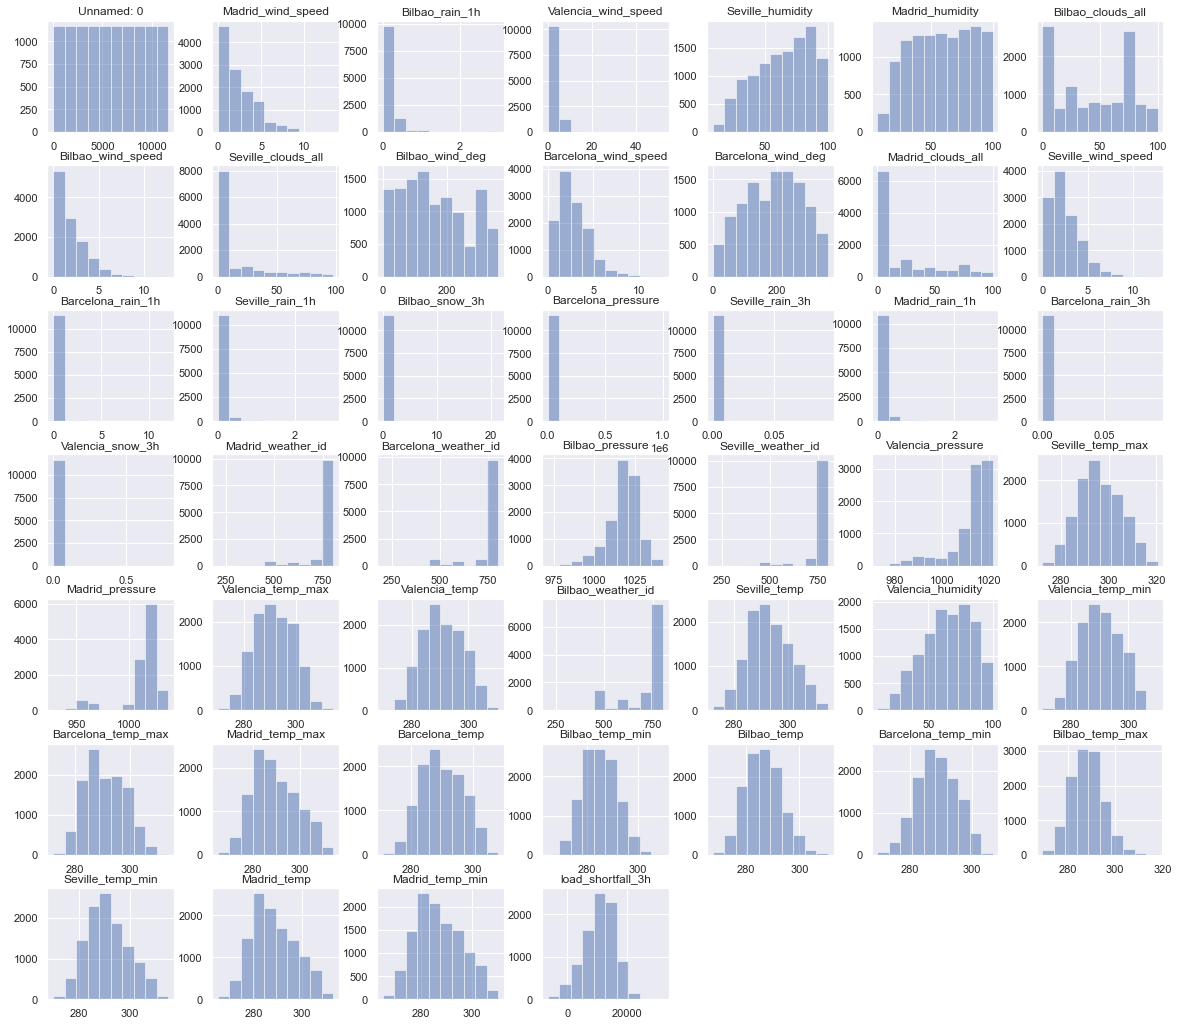

In [29]:
combined_df.hist(alpha=0.5, figsize=(20, 18))
plt.show()

<AxesSubplot:xlabel='Valencia_wind_speed'>

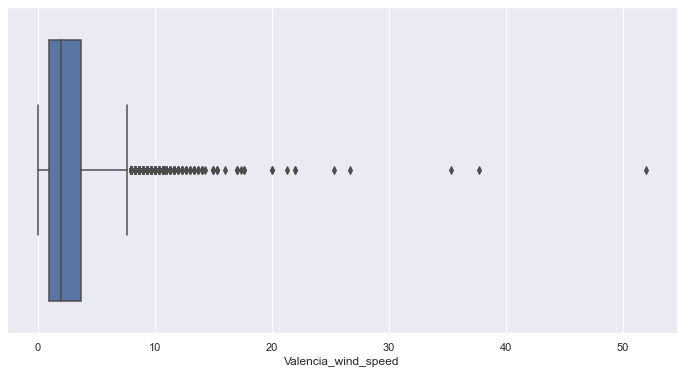

In [30]:
# plot relevant feature interactions
sns.boxplot(x='Valencia_wind_speed', data=combined_df)  #Visualizing the Valencia_wind_speed data

As we can see from the boxplot above, there are several number of outliers in this feature.

## Checking for Multicollinearity
It is very important that our independent variables should not be correlated amongst themselves because it can lead to increase in standard error. 
We can visually discover linearity between our variables within our `df` is through the use of a correlation heatmap.

First, let us check for correlation values among our independent variables

In [31]:
# evaluate correlation
corr = df_train.corr()
#plt.plot(corr['load_shortfall_3h'])
my_corr = corr['load_shortfall_3h'].reset_index()

In [32]:
#my_corr.drop([0, 47, 48, 49, 50, 51, 52, 53, 54, 55], axis = 0, inplace=True)

In [33]:
my_corr.set_index('index', inplace=True)

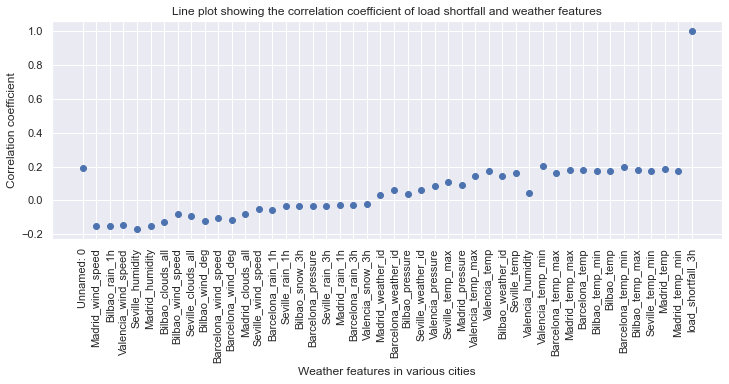

In [34]:
plt.figure(figsize=(12, 4))
plt.plot(my_corr, 'bo')
plt.xticks(rotation=90)
plt.title('Line plot showing the correlation coefficient of load shortfall and weather features')
plt.xlabel('Weather features in various cities')
plt.ylabel('Correlation coefficient')
plt.show()

Alright, let's view it on the Heatmap

<AxesSubplot:>

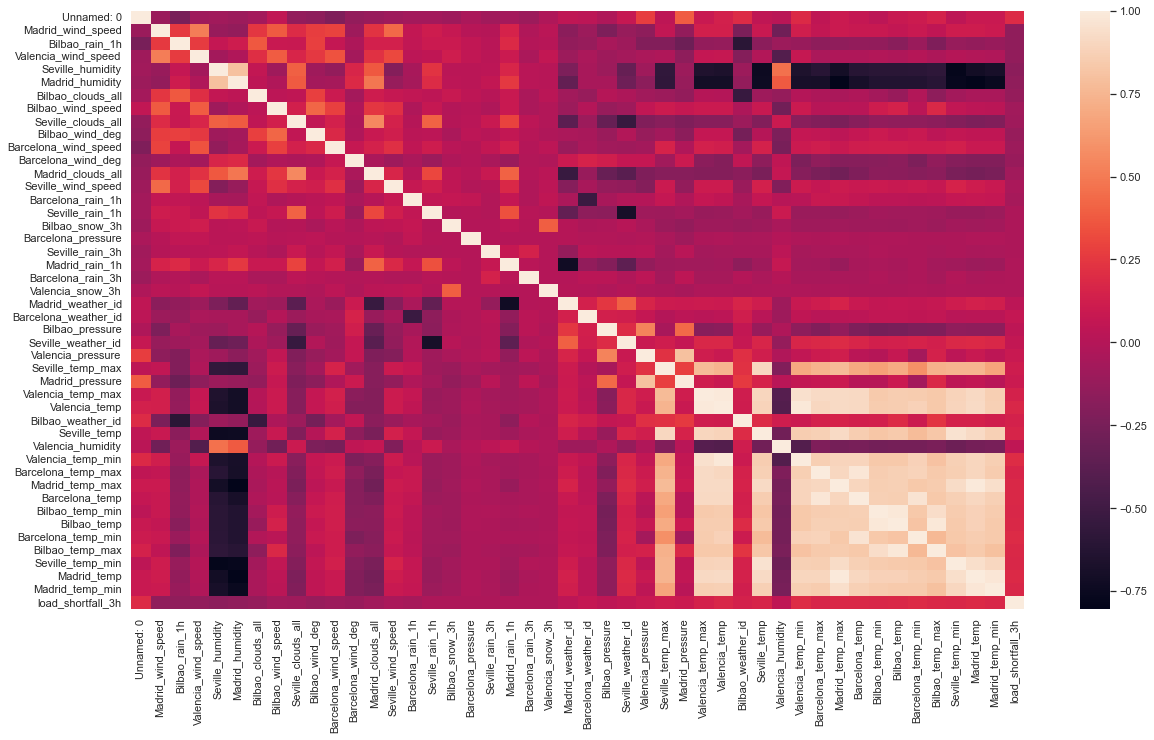

In [35]:
# Visualizing the correlation

sns.set(rc = {'figure.figsize':(20,11)})
sns.heatmap(corr)

We see on the heatmap above that there is presence of high correlation(almost white, and white) between features at the bottom right corner of our graph.
It is important to consider this step when choosing the best features which would result to an improvement of our model. We have to do something about those correlated features.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

In this stage of our predict, we are going to take action on those observation we had on our dataset earlier on. They include;
- Replacing the missing values with `mean()`
- Convert the features with **object** datatype to **numeric** datatype
- Breaking down the `time` feature in to different features such as `Year`, `Month`, `Day` etc
- Removing unneccessary column(s)
- Removing correlated column(s)
- Removing outliers for some features(Scaling)

While we do all these, we will create a function that with automatically help us clean our test data `df_test` which we have note yet loaded on this note. it will save us the stress of engineering the data all over again.

In [36]:
# Convert 'Valencia_wind_deg' and 'Seville_pressure' columns from object datatype to numeric datatype
df_train['Valencia_wind_deg'] = df_train['Valencia_wind_deg'].str.extract('(\d+)').astype('float')
df_train['Seville_pressure'] = df_train['Seville_pressure'].str.extract('(\d+)').astype('float')

In [37]:
# remove missing values/ features
# this is to fill those null values in Valencia_pressure column will its average(mean)
df_train['Valencia_pressure'].fillna(df_train['Valencia_pressure'].mean(), inplace=True)

# Now let us check to see if those null values are gone
df_train.isnull().sum()

Unnamed: 0              0
time                    0
Madrid_wind_speed       0
Valencia_wind_deg       0
Bilbao_rain_1h          0
Valencia_wind_speed     0
Seville_humidity        0
Madrid_humidity         0
Bilbao_clouds_all       0
Bilbao_wind_speed       0
Seville_clouds_all      0
Bilbao_wind_deg         0
Barcelona_wind_speed    0
Barcelona_wind_deg      0
Madrid_clouds_all       0
Seville_wind_speed      0
Barcelona_rain_1h       0
Seville_pressure        0
Seville_rain_1h         0
Bilbao_snow_3h          0
Barcelona_pressure      0
Seville_rain_3h         0
Madrid_rain_1h          0
Barcelona_rain_3h       0
Valencia_snow_3h        0
Madrid_weather_id       0
Barcelona_weather_id    0
Bilbao_pressure         0
Seville_weather_id      0
Valencia_pressure       0
Seville_temp_max        0
Madrid_pressure         0
Valencia_temp_max       0
Valencia_temp           0
Bilbao_weather_id       0
Seville_temp            0
Valencia_humidity       0
Valencia_temp_min       0
Barcelona_te

In [38]:
# create new features
df_train['Year']  = df_train['time'].astype('datetime64').dt.year
df_train['Month_of_year']  = df_train['time'].astype('datetime64').dt.month
df_train['Week_of_year'] = df_train['time'].astype('datetime64').dt.weekofyear
df_train['Day_of_year']  = df_train['time'].astype('datetime64').dt.dayofyear
df_train['Day_of_month']  = df_train['time'].astype('datetime64').dt.day
df_train['Day_of_week'] = df_train['time'].astype('datetime64').dt.dayofweek
df_train['Hour_of_week'] = ((df_train['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df_train['time'].astype('datetime64').dt.hour)
df_train['Hour_of_day']  = df_train['time'].astype('datetime64').dt.hour

# let us check our new features in the dataset with .info()
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 2   Madrid_wind_speed     8763 non-null   float64
 3   Valencia_wind_deg     8763 non-null   float64
 4   Bilbao_rain_1h        8763 non-null   float64
 5   Valencia_wind_speed   8763 non-null   float64
 6   Seville_humidity      8763 non-null   float64
 7   Madrid_humidity       8763 non-null   float64
 8   Bilbao_clouds_all     8763 non-null   float64
 9   Bilbao_wind_speed     8763 non-null   float64
 10  Seville_clouds_all    8763 non-null   float64
 11  Bilbao_wind_deg       8763 non-null   float64
 12  Barcelona_wind_speed  8763 non-null   float64
 13  Barcelona_wind_deg    8763 non-null   float64
 14  Madrid_clouds_all     8763 non-null   float64
 15  Seville_wind_speed   

In [39]:
df_train['load_shortfall_3h'].median()#.apply(lambda x: np.log(x))

11114.6666666667

In [40]:
# plt.figure(figsize = (12,4))
# for i, (keys, items) in enumerate(hourly_arch_dict.items()):
# #     ax = plt.subplot(151+i)
# df_train['time'].dt.year.value_counts().plot(kind='bar', subplots = True, ax = ax)
# #ax.set_title("{}".format(keys))
# plt.tight_layout()

### Removing features

Here, we will be removing unneccessary and correlated features from our dataset.


In [41]:
# engineer existing features
df_train.drop(columns=['Week_of_year', 'Valencia_temp_max', 'Bilbao_temp_min', 'Barcelona_temp_max', 
                 'Madrid_temp_min', 'Bilbao_temp_max', 'Day_of_year', 'Hour_of_week', 
                 'Unnamed: 0','time', 'Seville_temp_min', 'Madrid_temp_max', 'Valencia_temp', 
                 'Barcelona_temp', 'Seville_temp', 'Madrid_temp'], inplace=True)

df_train.shape

(8763, 41)

Let us check our heatmap for multicollinearity.


<AxesSubplot:>

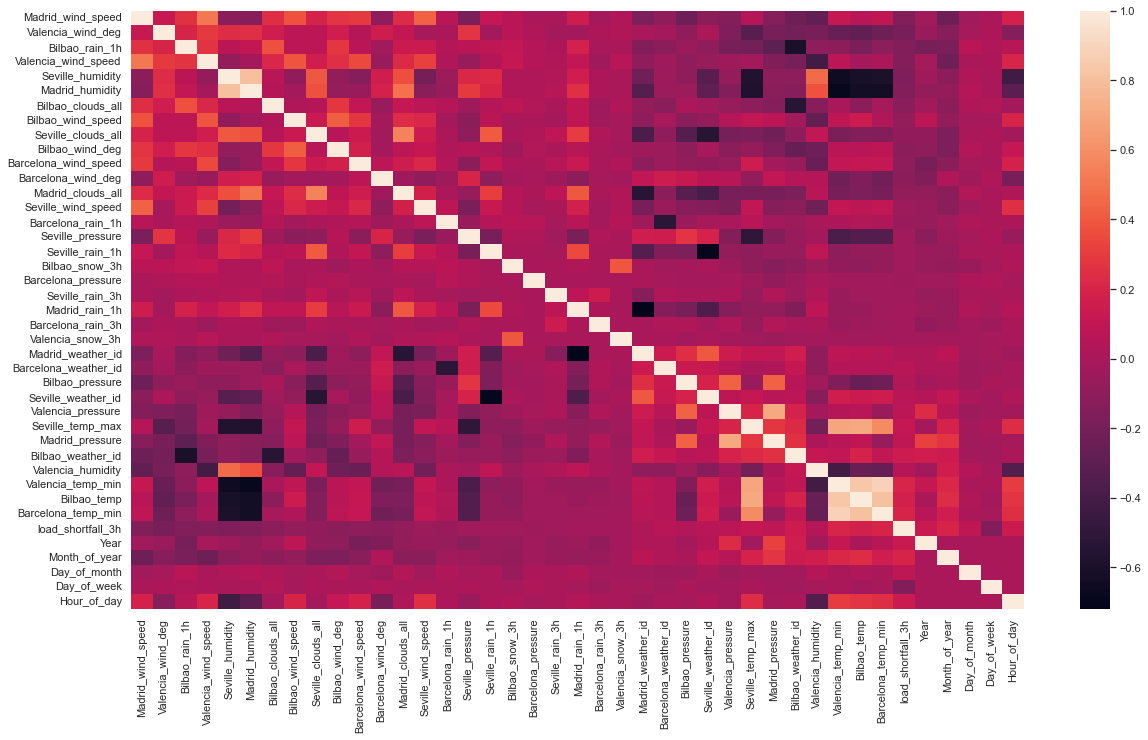

In [42]:
corr = df_train.corr()
sns.set(rc = {'figure.figsize':(20,11)})
sns.heatmap(corr)


#### Lastly, let us perform normalisation
For our models to predict or perform very well, we need to perform feature scaling. As metioned in our EDA, we discovered outliers and scaling our dataset will bring down the range of the features to a normal level. We will carry out Standard Scaling, becasue of it's robustness to outliers

In [43]:
# Initialize StandardScaler from sklearn
scaler = StandardScaler()

In [44]:
# Save standardized features into new variable
features = df_train.drop(columns = 'load_shortfall_3h') # here, we dont have to normalise our dependent variable
X_scaled = scaler.fit_transform(features)
X_scaled = pd.DataFrame(X_scaled,columns=features.columns)
X_scaled.head()

Madrid_wind_speed  Valencia_wind_deg  Bilbao_rain_1h  Valencia_wind_speed  \
0          -0.950708          -0.096053       -0.362123            -0.796169   
1          -1.130863           1.641580       -0.362123            -0.381412   
2          -0.770554           1.294054       -0.362123            -0.657917   
3          -0.770554           0.946527       -0.362123            -0.657917   
4          -0.770554           0.599000       -0.362123            -0.657917   

   Seville_humidity  Madrid_humidity  Bilbao_clouds_all  Bilbao_wind_speed  \
0          0.516117         0.270621          -1.335491          -0.501451   
1          0.692953         0.298017          -1.335491          -0.501451   
2          0.383491         0.284319          -1.335491          -0.501451   
3          0.118238        -0.044439          -1.335491          -0.501451   
4         -0.161751        -0.017043          -1.274045          -0.894581   

   Seville_clouds_all  Bilbao_wind_deg  ...  Bilbao_weather_id  \
0           -0.565065         0.630823  ...           0.649842   
1           -0.565065         0.607959  ...           0.649842   
2           -0.565065         0.542632  ...           0.649842   
3           -0.565065         0.398912  ...           0.649842   
4           -0.565065         0.255192  ...           0.649842   

   Valencia_humidity  Valencia_temp_min  Bilbao_temp  Barcelona_temp_min  \
0           0.540928          -2.892663    -2.505658           -1.218309   
1           0.298645          -2.626219    -2.353511           -1.292271   
2           0.021750          -1.716949    -1.671342           -1.124792   
3          -0.583957          -0.719283    -0.775541           -0.821553   
4          -0.358980          -0.992113    -0.611717           -0.693885   

       Year  Month_of_year  Day_of_month  Day_of_week  Hour_of_day  
0 -1.226179      -1.602429     -1.675368     -0.00274    -1.090901  
1 -1.226179      -1.602429     -1.675368     -0.00274    -0.654451  
2 -1.226179      -1.602429     -1.675368     -0.00274    -0.218001  
3 -1.226179      -1.602429     -1.675368     -0.00274     0.218449  
4 -1.226179      -1.602429     -1.675368     -0.00274     0.654899  

[5 rows x 40 columns]

<AxesSubplot:>

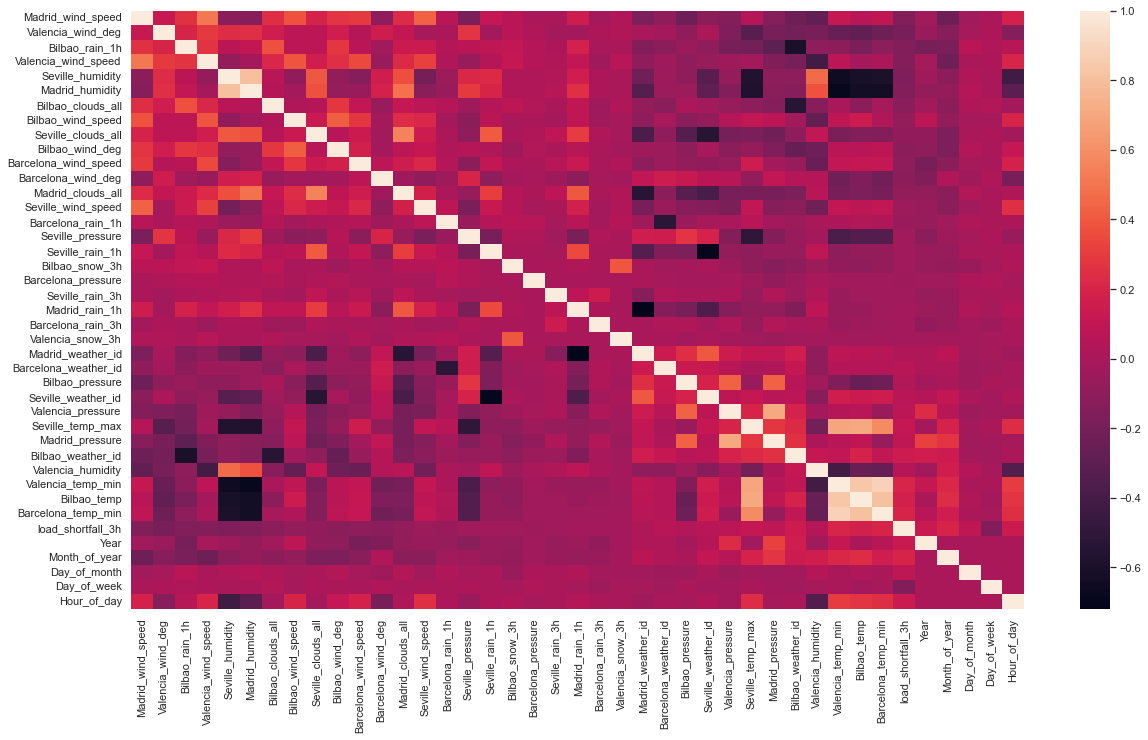

In [45]:
sns.set(rc = {'figure.figsize':(20,11)})
sns.heatmap(corr)

Judging from our new Heatmap, some of the new features are correlated as well. We will not include these features to our Independent variables for modeling.

Now we will remove the following features and check our Heatmap once again.
`Unnamed` `time` `Madrid_pressure` `Valencia_temp_max` `Valencia_temp` `Seville_temp` `Valencia_temp_min` `Barcelona_temp_max` `Madrid_temp_max` `Barcelona_temp` `Bilbao_temp_min` `Bilbao_temp` `Barcelona_temp_min` `Bilbao_temp_max`       
`Seville_temp_min` `Madrid_temp` `Madrid_temp_min` `Week_of_year` `Day_of_year` `Hour_of_week`         


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

#### Here in Model Building
- We'll split the dataset into train and test data, to be able to evaluate the model that we build using the train data.

- Build a base model(with Linear Regression) using the train data.

- Build other models like Lasso, Ridge, Decision Trees, and Random Forest that will help us achieve our aim of minimising the Mean Squared error of our predicion. 

In [46]:
# split data
X = X_scaled
y = df_train['load_shortfall_3h']
# We will split our data into training set and testing set using sklearn train_test_split. 
# What we will do here is to split our data into 80% for training and the remaining 20% for testing i.e test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [47]:
#checking the shape of our train and test data

print('Training features:', X_train.shape)
print('Training target:', y_train.shape)
print('Testing features:', X_test.shape)
print('Testing target:', y_test.shape)

Training features: (7010, 40)
Training target: (7010,)
Testing features: (1753, 40)
Testing target: (1753,)


#### Creating and training our Base Model (Linear Regression) with our train data 
We will create our base model (Linear Regression)


## Multiple Linear Regression Model

In [48]:
#Initialise the model
lm = LinearRegression()

#Fit the model into training set
lm.fit(X_train, y_train)

#predict on unseen data
predict = lm.predict(X_test)

Linear_predict = lm.predict(X_test) #predicting on the same training set

### Building and training a Ridge Regression Model with our train data 

In [49]:
# Initialise Ridge model
Rg = Ridge()

# Train the model
Rg.fit(X_train, y_train)

# Predictions
Ridge_predict = Rg.predict(X_test)

### Building and training a Lasso Regression Model with our train data 

In [50]:
# Initialise LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)
# Train the LASSO model
lasso.fit(X_train, y_train)
# Predictions
lasso_predict = lasso.predict(X_test)

### Building and training a Decision Tree Regression Model with our train data 

In [51]:
# Initialise regression tree model
Reg_tree = DecisionTreeRegressor(random_state=42)
# Fitting the model
Reg_tree.fit(X_train,y_train)
# Predictions
Decision_Tree_predict = Reg_tree.predict(X_test)

### Building and training a Random Forest Regression Model with our train data 

In [52]:
# Initialise Random forest consisting of 200 trees with a max depth of 8 
RF = RandomForestRegressor(n_estimators=200, max_depth=8)
# Fitting the model
RF.fit(X_train,y_train)
# Predictions
Random_Forest_predict = RF.predict(X_test)

In this section of our notebook, we will evaluate the performance of the models we have built and trained using metrics such as-

- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-Squared (R^2) or Coefficient of determination

We built Five Models in total.

In [53]:
# evaluate one or more ML models
Linear_Model = pd.DataFrame({'load_shortfall_3h': y_test, 'Linear Predicted': Linear_predict})
Lasso_Model = pd.DataFrame({'load_shortfall_3h': y_test, 'Lasso_Predicted': lasso_predict})
Ridge_Model = pd.DataFrame({'load_shortfall_3h': y_test, 'Ridge_Predicted': Ridge_predict})
Decision_Tree_Model = pd.DataFrame({'load_shortfall_3h': y_test, 'Decision Tree Predicted': Decision_Tree_predict})
Random_Forest_Model = pd.DataFrame({'load_shortfall_3h': y_test, 'Random Forest Predicted': Random_Forest_predict})

print(Linear_Model.head()) 
print('\n')
print(Lasso_Model.head()) 
print('\n')
print(Ridge_Model.head()) 
print('\n')
print(Decision_Tree_Model.head()) 
print('\n')
print(Random_Forest_Model.head()) 

      load_shortfall_3h  Linear Predicted
1226       11450.666667      12226.742076
7903       13693.333333      11642.036680
1559       18337.333333      10451.998075
3621       -1221.000000       9574.741254
7552        8515.000000      14588.977173


      load_shortfall_3h  Lasso_Predicted
1226       11450.666667     12226.711651
7903       13693.333333     11642.050431
1559       18337.333333     10452.038060
3621       -1221.000000      9574.782180
7552        8515.000000     14588.915568


      load_shortfall_3h  Ridge_Predicted
1226       11450.666667     12226.814894
7903       13693.333333     11641.865442
1559       18337.333333     10451.745717
3621       -1221.000000      9574.807323
7552        8515.000000     14588.728427


      load_shortfall_3h  Decision Tree Predicted
1226       11450.666667              1540.000000
7903       13693.333333             11686.666667
1559       18337.333333             18497.666667
3621       -1221.000000              6028.000000
7552 

## Evaluation

Let us evaluate the performance of five MODELS we trained using metrics such as-

 - Root Mean Squared Error (RMSE) 
 - Mean Squared Error (MSE)
 - Mean Absolute Error (MAE)
 - Residual Sum of Squares Error (RSS)

In [54]:
#Comparing the True value and the Predicted Value of our models
Linear = pd.DataFrame({'Actual': y_test, 'Predicted': predict})
Lass_ = pd.DataFrame({'Actual': y_test, 'Predicted': lasso_predict})
Ridge_ = pd.DataFrame({'Actual': y_test, 'Predicted': Ridge_predict})
Des_ = pd.DataFrame({'Actual': y_test, 'Predicted': Decision_Tree_predict})
Rand_ = pd.DataFrame({'Actual': y_test, 'Predicted': Random_Forest_predict})

In [55]:
print(Linear.head()) #Linear Model 
print('\n')
print(Lass_.head()) # Lasso Model
print('\n')
print(Ridge_.head()) # Ridge Model
print('\n')
print(Des_.head()) #Decision Tree Model
print('\n')
print(Rand_.head()) # Random Forest Model

            Actual     Predicted
1226  11450.666667  12226.742076
7903  13693.333333  11642.036680
1559  18337.333333  10451.998075
3621  -1221.000000   9574.741254
7552   8515.000000  14588.977173


            Actual     Predicted
1226  11450.666667  12226.711651
7903  13693.333333  11642.050431
1559  18337.333333  10452.038060
3621  -1221.000000   9574.782180
7552   8515.000000  14588.915568


            Actual     Predicted
1226  11450.666667  12226.814894
7903  13693.333333  11641.865442
1559  18337.333333  10451.745717
3621  -1221.000000   9574.807323
7552   8515.000000  14588.728427


            Actual     Predicted
1226  11450.666667   1540.000000
7903  13693.333333  11686.666667
1559  18337.333333  18497.666667
3621  -1221.000000   6028.000000
7552   8515.000000  10368.666667


            Actual     Predicted
1226  11450.666667   7689.542070
7903  13693.333333  16219.228116
1559  18337.333333  14130.675915
3621  -1221.000000   4401.992149
7552   8515.000000  10250.314491


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

Let us test our model's performance based on the Metrics.

- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- R-Squared (R^2)

In [60]:
Random_Forest_predict2 = RF.predict(X_train)
Decision_Tree_predict2 = Reg_tree.predict(X_train)
lasso_predict2 = lasso.predict(X_train)
Ridge_predict2 = Rg.predict(X_train)
predict2 = lm.predict(X_train)

In [62]:
#y_train_pred = Random_Forest_predict2.predict(X_train)
rmse = metrics.mean_squared_error(y_train, Decision_Tree_predict2, squared=False)
rmse

0.0

In [63]:
Model_Performance3 = { 
    
                      'Train RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_train,predict2)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_train,Ridge_predict2)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_train,lasso_predict2)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_train,Decision_Tree_predict2)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_train,Random_Forest_predict2))}
                        
                    }

# create dataframe from dictionary
Model_Performance3 = pd.DataFrame(data=Model_Performance3)
Model_Performance3

Train RMSE
Decision Tree     0.000000
Lasso          4697.159489
Linear model   4697.159488
Random Forest  2722.051634
Ridge          4697.159505

### The Root Mean Square Error of each Model

In [65]:
Model_Performance = { 
    
                      'Test RMSE':
                    
                        {"Linear model": np.sqrt(metrics.mean_squared_error(y_test,predict)),
                        "Ridge": np.sqrt(metrics.mean_squared_error(y_test,Ridge_predict)),
                        "Lasso" : np.sqrt(metrics.mean_squared_error(y_test,lasso_predict)),
                        "Decision Tree" : np.sqrt(metrics.mean_squared_error(y_test,Decision_Tree_predict)),
                        "Random Forest" : np.sqrt(metrics.mean_squared_error(y_test,Random_Forest_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance = pd.DataFrame(data=Model_Performance)
Model_Performance

Test RMSE
Decision Tree  3975.130109
Lasso          4794.519294
Linear model   4794.515917
Random Forest  3322.779809
Ridge          4794.536351

In [66]:
Model_Performance['Train RMSE'] = Model_Performance3['Train RMSE']
Model_Performance

Test RMSE   Train RMSE
Decision Tree  3975.130109     0.000000
Lasso          4794.519294  4697.159489
Linear model   4794.515917  4697.159488
Random Forest  3322.779809  2722.051634
Ridge          4794.536351  4697.159505

<Figure size 432x288 with 0 Axes>

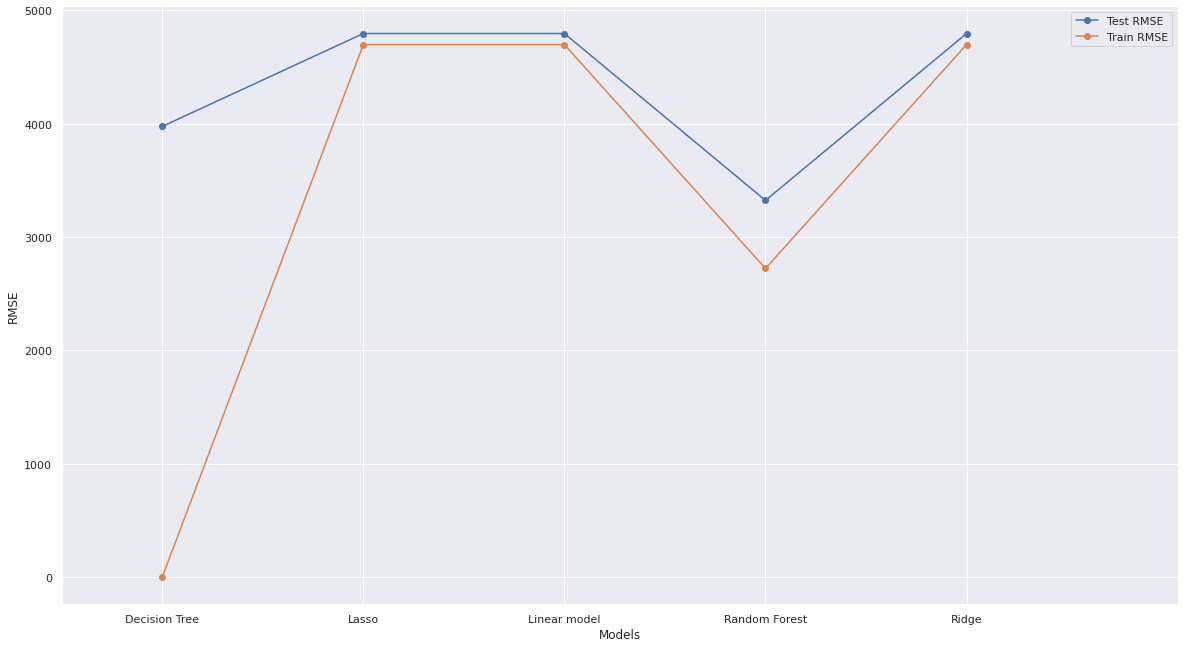

In [79]:
# font = {'family' : 'DejaVu Sans',
#         'weight' : 'normal',
#         'size'   : 40}

# plt.rc('font', **font)

plt.rcParams.update({'font.size': 48})


_ = plt.figure(figsize=(6,4))
_ = Model_Performance.plot(style='o-')
_ = plt.xticks(ticks = range(0,len(Model_Performance)), labels = Model_Performance.index.values)
_ = plt.xlim([-0.5,len(Model_Performance)+0.05])
_ = plt.ylabel('RMSE')
_ = plt.xlabel('Models')
#_ = plt.tight_layout()

In [182]:
px.bar(Model_Performance, y=Model_Performance['Test RMSE'],
       color = Model_Performance.index, width =700, height=400)

### The Mean Squared Error of each Model

In [183]:
Model_Performance2 = { 
    
                      'Test MSE':
                    
                        {"Linear model": (metrics.mean_squared_error(y_test,predict)),
                        "Ridge": (metrics.mean_squared_error(y_test,Ridge_predict)),
                        "Lasso" : (metrics.mean_squared_error(y_test,lasso_predict)),
                        "Decision Tree" : (metrics.mean_squared_error(y_test,Decision_Tree_predict)),
                        "Random Forest" : (metrics.mean_squared_error(y_test,Random_Forest_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance2 = pd.DataFrame(data=Model_Performance2)
Model_Performance2

Test MSE
Decision Tree  1.580166e+07
Lasso          2.298742e+07
Linear model   2.298738e+07
Random Forest  1.117382e+07
Ridge          2.298758e+07

In [184]:
px.bar(Model_Performance2, y =Model_Performance2['Test MSE'],
       color = Model_Performance2.index, width =700, height=400)

### The R-Squared of each Model

In [185]:
Model_Performance4= { 
    
                      'Test R^2':
                    
                        {"Linear model": (metrics.r2_score(y_test,predict)),
                        "Ridge": (metrics.r2_score(y_test,Ridge_predict)),
                        "Lasso" : (metrics.r2_score(y_test,lasso_predict)),
                        "Decision Tree" : (metrics.r2_score(y_test,Decision_Tree_predict)),
                        "Random Forest" : (metrics.r2_score(y_test,Random_Forest_predict))}
                        
                    }

# create dataframe from dictionary
Model_Performance4 = pd.DataFrame(data=Model_Performance4)
Model_Performance4

Test R^2
Decision Tree  0.438919
Lasso          0.183769
Linear model   0.183770
Random Forest  0.603243
Ridge          0.183763

In [186]:
px.bar(Model_Performance4, y =Model_Performance4['Test R^2'],
       color = Model_Performance4.index, width =700, height=400)

px.bar(Model_Performance3, y =Model_Performance3['Coefficient of determination (R^2)'],
       color = Model_Performance3.index, width =700, height=400)

## Predicting the Load_shortfall with the test set on Kaggle

Instead of going through EDA and Data Engineering all over again for  the given test dataset, let us create a function that will easily do the job for us.

In [187]:
# create a function to use in cleaning the test data

def engineer_data(filepath):
    # Read csv file into dataframe 
    df = pd.read_csv(filepath)
    
     # create new features
    df['Year']  = df['time'].astype('datetime64').dt.year
    df['Month_of_year']  = df['time'].astype('datetime64').dt.month
    df['Week_of_year'] = df['time'].astype('datetime64').dt.weekofyear
    df['Day_of_year']  = df['time'].astype('datetime64').dt.dayofyear
    df['Day_of_month']  = df['time'].astype('datetime64').dt.day
    df['Day_of_week'] = df['time'].astype('datetime64').dt.dayofweek
    df['Hour_of_week'] = ((df['time'].astype('datetime64').dt.dayofweek) * 24 + 24) - (24 - df['time'].astype('datetime64').dt.hour)
    df['Hour_of_day']  = df['time'].astype('datetime64').dt.hour
    
    #Filling missing values
    df['Valencia_pressure'].fillna(df['Valencia_pressure'].mean(), inplace = True)
    
    #converting Valencia_wind_deg and Seville_pressure from object to numeric
    df['Valencia_wind_deg'] = df['Valencia_wind_deg'].str.extract('(\d+)').astype('float')
    df['Seville_pressure'] = df['Seville_pressure'].str.extract('(\d+)').astype('float')
    
    df.drop(columns=['Week_of_year', 'Valencia_temp_max', 'Bilbao_temp_min', 'Barcelona_temp_max', 
                 'Madrid_temp_min', 'Bilbao_temp_max', 'Day_of_year', 'Hour_of_week', 
                 'Unnamed: 0','time', 'Seville_temp_min', 'Madrid_temp_max', 'Valencia_temp', 
                 'Barcelona_temp', 'Seville_temp', 'Madrid_temp'], inplace=True)
    
    # Initialize StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df)
    X_scaled = pd.DataFrame(X_scaled,columns=df.columns)
    
    return X_scaled

In [189]:
df_test = pd.read_csv("df_test.csv")
time = df_test['time']

In [190]:
X_test = engineer_data("df_test.csv")

In [191]:
# evaluate one or more ML models
X_test['load_shortfall_3h'] = RF.predict(X_test)

In [192]:
X_test['time'] = time
load = X_test[['time','load_shortfall_3h']]
load.to_csv('predicted_load_shortfall12.csv', index = False)
load

time  load_shortfall_3h
0     2018-01-01 00:00:00        7640.839868
1     2018-01-01 03:00:00        2820.719145
2     2018-01-01 06:00:00        3292.035760
3     2018-01-01 09:00:00        5920.576728
4     2018-01-01 12:00:00        6360.644980
...                   ...                ...
2915  2018-12-31 09:00:00       14042.429011
2916  2018-12-31 12:00:00       14920.638212
2917  2018-12-31 15:00:00       14568.004036
2918  2018-12-31 18:00:00       15479.884477
2919  2018-12-31 21:00:00       16074.211620

[2920 rows x 2 columns]

In [264]:
#Decision_Tree_Model['Hour_of_day'] = df_train['Hour_of_day']#.columns
#Ridge_Model

Linear_plot = Linear_Model.groupby('Hour_of_day').mean()
Lasso_plot = Lasso_Model.groupby('Hour_of_day').mean()
Ridge_plot = Ridge_Model.groupby('Hour_of_day').mean()
Decision_Tree_plot = Decision_Tree_Model.groupby('Hour_of_day').mean()
Random_Forest_plot = Random_Forest_Model.groupby('Hour_of_day').mean()

#Linear_Model['Hour_of_day'] = df_train['Hour_of_day']

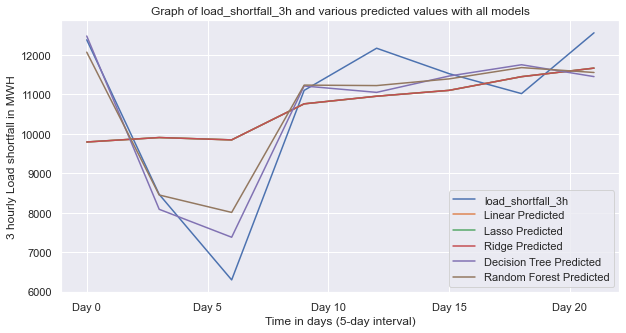

In [266]:
plt.figure(figsize=(10,5))
#['Year'] = df_train['Year']
plt.plot(Linear_plot['load_shortfall_3h'], label='load_shortfall_3h')
plt.plot(Linear_plot['Linear Predicted'], label='Linear Predicted')
plt.plot(Lasso_plot['Lasso_Predicted'], label='Lasso Predicted')
plt.plot(Ridge_plot['Ridge_Predicted'], label='Ridge Predicted')
plt.plot(Decision_Tree_plot['Decision Tree Predicted'], label='Decision Tree Predicted')
plt.plot(Random_Forest_plot['Random Forest Predicted'], label='Random Forest Predicted')

plt.xlabel('Time in days (5-day interval)')
plt.ylabel('3 hourly Load shortfall in MWH')
plt.title('Graph of load_shortfall_3h and various predicted values with all models')
plt.legend()
plt.xticks([0, 5, 10, 15, 20], ['Day 0', 'Day 5', 'Day 10', 'Day 15', 'Day 20'])
plt.show()

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic

### The best model and why it is the best choice

From the graphs shown above, we can say that the **Random Forest Model** performs better than the others.
Random Forest again has a lower Root Mean Squared Error for both the Training and Test data as compared to the other models.
We will choose Random Forest for our model Predictions because it has the qualities for a perfect regression model on our given dataset and gives better performing metrics.
We can therefore conclude that Random Forest is the best model to use for prediction of  `load_shortfall_3h`.

**We have to explain all the models we have used!**